<a href="https://colab.research.google.com/github/lphuong304/CS116.M11/blob/main/Practice%20In%20Class/19520227/BaiTap6/19520227_BT6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><strong>BÀI TẬP  - 12/10/2021</strong></h1>
<h1 align="center"><strong>LẬP TRÌNH PYTHON CHO MÁY HỌC CS116.M11 - PCA VÀ BÀI TOÁN PHÂN LỚP </strong></h1>

# GIỚI THIỆU:

1. Họ và tên: Nguyễn Ngọc Lan Phương
2. MSSV: 19520227 - KHMT2019
3. Lớp: CS116.M11
4. Bài tập: PCA và bài toán phân lớp.
5. Ngày thực hiện: 12/10/2021

In [ ]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns 
from scipy import stats
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.linear_model import LogisticRegression

#bước 1: get data

In [ ]:
!gdown --id 1QpU6BMKw5EmZnjSogIM3IS2a2MUR_uAG

Downloading...
From: https://drive.google.com/uc?id=1QpU6BMKw5EmZnjSogIM3IS2a2MUR_uAG
To: /content/Wine.csv
100% 11.5k/11.5k [00:00<00:00, 20.4MB/s]


In [ ]:
data = pd.read_csv('/content/Wine.csv')

In [ ]:
data.head(13)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


#EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<Figure size 1440x1656 with 0 Axes>

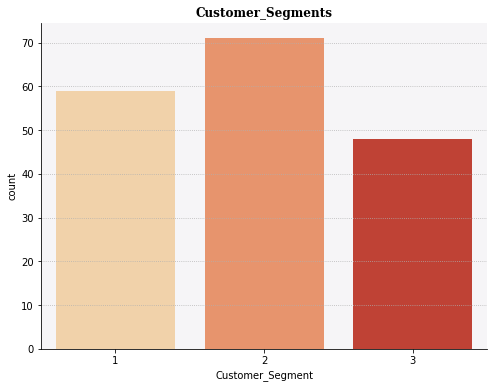

In [ ]:
#visualiez data
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
_,ax = plt.subplots(nrows = 1,  ncols=1, figsize=(8,6))
ax.set_facecolor(background_color)
ax.set_title('Customer_Segments',fontweight='bold',fontfamily='serif')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
ax.grid(linestyle=':',axis='y')
sns.countplot(data.Customer_Segment,palette='OrRd')

#preprocessing data

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


##bước 2: scale data features to range [0,1]

In [ ]:
scaledData = StandardScaler().fit_transform(X)
scaledData.shape

(178, 13)

##bước 3: using PCA to reduce demesion d = 2 (hoặc 3, 4)



In [ ]:
pcaData = PCA(n_components=3).fit_transform(scaledData)

In [ ]:
pcaData.shape

(178, 3)

## bước 4: split data into train and test datasets (train : test = 8 : 2)c

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(pcaData,y,test_size=0.2, random_state=42)

##bước 5: training and predict using logistic regression

In [ ]:
lr = LogisticRegression(random_state=0).fit(x_train, y_train)
lr_predict = lr.predict(x_test)

##get accuracy

In [ ]:
print("Độ chính xác: {}".format(accuracy_score(lr_predict, y_test)))

Độ chính xác: 0.9722222222222222
